In [1]:
import xarray as xr
import rioxarray
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geopandas as gpd
import osmnx
from pyproj import Transformer

In [2]:
from matplotlib import rcParams
font_size = 17
rcParams['axes.titlesize'] = font_size
rcParams['axes.titleweight'] = 'bold'
rcParams['axes.labelsize'] = font_size - 2
rcParams['xtick.labelsize'] = font_size - 2
rcParams['ytick.labelsize'] = font_size - 2
rcParams['legend.fontsize'] = font_size
rcParams['figure.titlesize'] = font_size
rcParams['figure.titleweight'] = 'bold'

In [3]:
ghs_pop = xr.open_mfdataset('../data/GHSL/GHS_POP_E2020_GLOBE_R2023A_54009_100_V1_0_R6_C9.tif')['band_data']
ghs_pop = ghs_pop.sortby('y')
# ghs_pop_r6 = xr.open_mfdataset('../data/GHSL/GHS_POP_E2020_GLOBE_R2023A_54009_100_V1_0_R6_C9.tif')['band_data']
# ghs_pop_r7 = xr.open_mfdataset('../data/GHSL/GHS_POP_E2020_GLOBE_R2023A_54009_100_V1_0_R7_C9.tif')['band_data']
# ghs_pop = xr.merge([ghs_pop_r6, ghs_pop_r7])['band_data']

In [4]:
ghs_pop.y.diff(dim='y')

<xarray.DataArray 'y' (y: 9999)>
array([100., 100., 100., ..., 100., 100., 100.])
Coordinates:
  * y            (y) float64 3e+06 3e+06 3e+06 3e+06 ... 4e+06 4e+06 4e+06 4e+06
    spatial_ref  int64 ...

In [5]:
transformer = Transformer.from_crs("EPSG:4326", "ESRI:54009", always_xy=True)
x_center, y_center = transformer.transform(-100.31, 25.697)

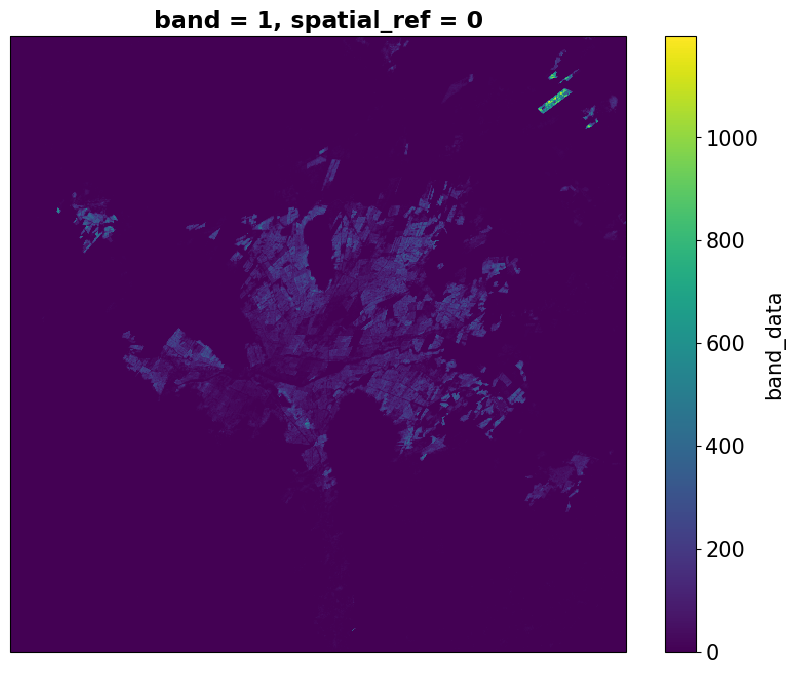

In [6]:
fig, axs = plt.subplots(subplot_kw={'projection': ccrs.Mollweide()},
                        figsize=(10, 8)
                       )

pad = 3e4
ghs_pop.sel(y=slice(y_center-pad, y_center+pad), x=slice(x_center-pad, x_center+pad)).plot(ax=axs)

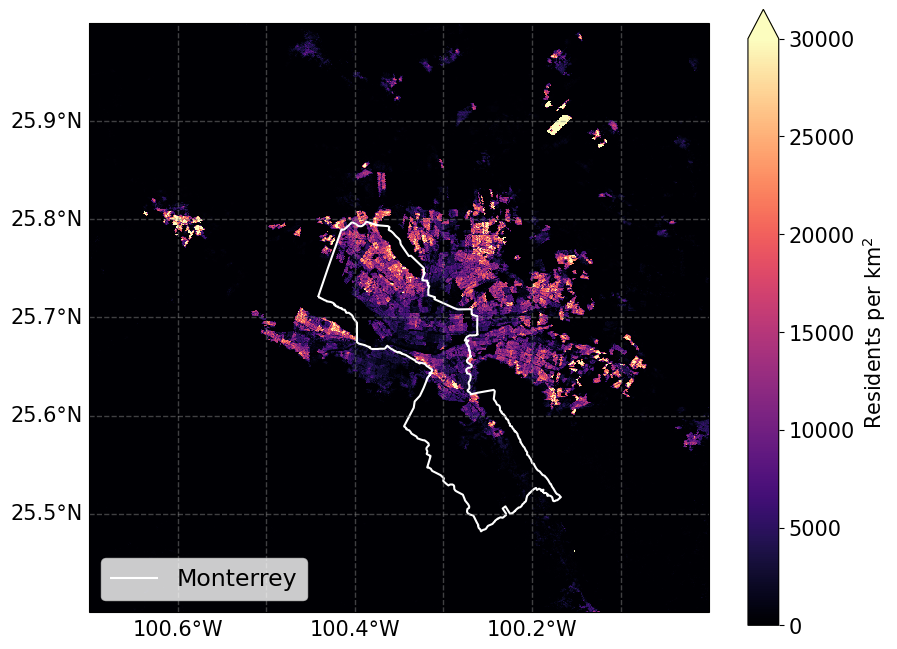

In [7]:
fig, axs = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(10, 8)
                       )

pad = 1e5
# number of people per cell (100*100m) 1e4 m2 --> * 1e2 km2
(ghs_pop.sel(y=slice(y_center-pad, y_center+pad), x=slice(x_center-pad, x_center+pad))*100).plot(ax=axs, transform=ccrs.Mollweide(),
                                                                                                 vmin=0, vmax=3e4, cmap='magma',
                                                                                                 cbar_kwargs={'label': 'Residents per km$^2$'},
                                                                                                 )

gl = axs.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 15}
gl.ylabel_style = {'size': 15}


axs.set_extent((-100.7, -100, 25.4, 26))

# https://www.openstreetmap.org/relation/5606060#map=11/25.6400/-100.3045
Monterrey  = osmnx.geocode_to_gdf("Municipio de Monterrey")
Monterrey_area = osmnx.geocode_to_gdf("Nuevo León")
boundary_Monterrey = Monterrey.boundary
boundary_Monterrey_area = Monterrey_area.boundary

boundary_Monterrey.plot(ax=axs, color='w', label='Monterrey')
plt.legend(loc='lower left')

axs.set_title('')
fig.savefig('../figures/monterrey_population.png', bbox_inches='tight', dpi=300)